<a href="https://colab.research.google.com/github/ALRIER/DtaScienceAssignments_WaterlooUniversity/blob/Assignments/Stats4DataScience/Stats4DS_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-profiling[notebook]
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import pandas_profiling
from scipy.stats import chi2_contingency
from matplotlib import style
from scipy import stats
from scipy.stats import shapiro
from pandas_profiling import ProfileReport
from google.colab import drive
plt.style.use('ggplot')
%matplotlib inline
warnings.filterwarnings('ignore')   
drive.mount('/content/drive') 

<ipython-input-2-95b92df263f4>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dftest=pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/GroupAssignment2/test.csv')
#dftest=pd.DataFrame(dftest)
dftest.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [4]:
dftrain=pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/GroupAssignment2/train.csv')
#dftrain=pd.DataFrame(dftrain)
dftrain.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Mixing databases in one to check the whole picture.

In [5]:
frames=[dftrain,dftest]
dftotal= pd.concat(frames)
dftotal.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


It's the re-coding time! 

Hands-on data engineering ... let's torture the data!

In [6]:
zone_dict = {"A": 1, "C": 2, "FV": 3, "I": 4, "RH": 5, "RL": 6, "RP": 7, "RM": 8}

for zone, code in zone_dict.items():
    dftotal.loc[:, 'MSZoning'].replace(zone, code, inplace=True)
dftotal

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,6,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,6,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,6,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,6,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,6,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,8,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,8,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,6,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,6,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [7]:
#Make another copy of the dataframe, it will be my df1

dftotal.loc[:,'Street'].replace(["Grvl","Pave"],[0,1],inplace=True)
dftotal.loc[:,'Alley'].replace(["Grvl","Pave","NA"],[1,2,0],inplace=True)
dftotal.loc[:,'LotShape'].replace(["Reg","IR1","IR2","IR3"],[1,2,3,4],inplace=True)
dftotal.loc[:,'LandContour'].replace(["Lvl","Bnk","HLS","Low"],[1,2,3,4],inplace=True)
dftotal.loc[:,'Utilities'].replace(["AllPub","NoSewr","NoSeWa","ELO"],[1,2,3,4],inplace=True)
dftotal.loc[:,'LotConfig'].replace(["Inside","Corner","CulDSac","FR2","FR3"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'LandSlope'].replace(["Gtl","Mod","Sev"],[1,2,3],inplace=True)
dftotal.loc[:,'Neighborhood'].replace(["Blmngtn","Blueste","BrDale","BrkSide","ClearCr","CollgCr","Crawfor","Edwards","Gilbert","IDOTRR","MeadowV","Mitchel","Names	North Ames","NoRidge","NPkVill","NridgHt","NWAmes","OldTown","SWISU","Sawyer","SawyerW","Somerst","StoneBr","Timber","Veenker"],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],inplace=True)
dftotal.loc[:,'Condition1'].replace(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],[1,2,3,4,5,6,7,8,9],inplace=True)
dftotal.loc[:,'Condition2'].replace(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],[1,2,3,4,5,6,7,8,9],inplace=True)
dftotal.loc[:,'BldgType'].replace(["Fam","FmCon","Duplx","TwnhsE","TwnhsI"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'HouseStyle'].replace(["1Story","1.5Fin","1.5Unf","2Story","2.5Fin","2.5Unf","SFoyer","SLvl"],[1,2,3,4,5,6,7,8],inplace=True)
dftotal.loc[:,'RoofStyle'].replace(["Flat","Gable","Gambrel","Hip","Mansard","Shed"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'RoofMatl'].replace(["ClyTile","CompShg","Membran","Metal","np.roll","Tar&Grv","WdShake","WdShngl"],[1,2,3,4,5,6,7,8],inplace=True)
dftotal.loc[:,'Exterior1st'].replace(["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],inplace=True)
dftotal.loc[:,'Exterior2nd'].replace(["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],inplace=True)
dftotal.loc[:,'MasVnrType'].replace(["BrkCmn","BrkFace","CBlock","None","Stone"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'ExterQual'].replace(["Ex","Gd","TA","Fa","Po"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'ExterCond'].replace(["Grvl","Pave","NA"],[1,2,0],inplace=True)
dftotal.loc[:,'Foundation'].replace(["BrkTil","CBlock","PConc","Slab","Stone","Wood"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'BsmtQual'].replace(["Ex","Gd","TA","Fa","Po","NA"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'BsmtCond'].replace(["Ex","Gd","TA","Fa","Po","NA"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'BsmtExposure'].replace(["Gd","Av","Mn","No","NA"],[1,2,3,4,5],inplace=True)
dftotal

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,6,65.0,8450,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,6,80.0,9600,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,6,68.0,11250,1,NaN,2,1,1.0,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,6,60.0,9550,1,NaN,2,1,1.0,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,6,84.0,14260,1,NaN,2,1,1.0,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,8,21.0,1936,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,8,21.0,1894,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,6,160.0,20000,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,6,62.0,10441,1,NaN,1,1,1.0,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [8]:
dftotal.loc[:,'BsmtFinType1'].replace(["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],[1,2,3,4,5,6,7],inplace=True)
dftotal.loc[:,'BsmtFinType2'].replace(["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],[1,2,3,4,5,6,7],inplace=True)
dftotal.loc[:,'Heating'].replace(["Floor","GasA","GasW","Grav","OthW","Wall"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'HeatingQC'].replace(["Ex","Gd","TA","Fa","Po"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'BsmtExposure'].replace(["Gd","Av","Mn","No","NA"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'BsmtFinType1'].replace(["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],[1,2,3,4,5,6,7],inplace=True)
dftotal.loc[:,'BsmtFinType2'].replace(["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],[1,2,3,4,5,6,7],inplace=True)
dftotal.loc[:,'Heating'].replace(["Floor","GasA","GasW","Grav","OthW","Wall"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'HeatingQC'].replace(["Ex","Gd","TA","Fa","Po"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'CentralAir'].replace(["N","Y"],[0,1],inplace=True)
dftotal.loc[:,'Electrical'].replace(["SBrkr","FuseA","FuseF","FuseP","Mix"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'KitchenQual'].replace(["Ex","Gd","TA","Fa","Po"],[1,2,3,4,5],inplace=True)
dftotal.loc[:,'Functional'].replace(["Typ","Min1","Min2","Mod","Maj1","Maj2","Sev","Sal"],[1,2,3,4,5,6,7,8],inplace=True)
dftotal.loc[:,'FireplaceQu'].replace(["Ex","Gd","TA","Fa","Po","NA"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'GarageType'].replace(["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","NA"],[1,2,3,4,5,6,7],inplace=True)
dftotal.loc[:,'GarageFinish'].replace(["Fin","RFn","Unf","NA"],[1,2,3,4],inplace=True)
dftotal.loc[:,'GarageQual'].replace(["Ex","Gd","TA","Fa","Po","NA"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'GarageCond'].replace(["Ex","Gd","TA","Fa","Po","NA"],[1,2,3,4,5,6],inplace=True)
dftotal.loc[:,'PavedDrive'].replace(["Y","P","N"],[1,2,3],inplace=True)


In [9]:
# create a dictionary with replacement values for each variable
replacement_dict = {
    'PoolQC': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'NA': 5},
    'Fence': {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'NA': 5},
    'MiscFeature': {'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5, 'NA': 6},
    'SaleType': {'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6, 'ConLw': 7, 'ConLI': 8, 'ConLD': 9, 'Oth': 10},
    'SaleCondition': {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6}
}

# loop through each variable and replace the values using the dictionary
for variable, replacements in replacement_dict.items():
    dftotal.loc[:,variable].replace(replacements, inplace=True)


In [10]:
dftotal

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,6,65.0,8450,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,2,2008,1.0,1,208500.0
1,2,20,6,80.0,9600,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,5,2007,1.0,1,181500.0
2,3,60,6,68.0,11250,1,NaN,2,1,1.0,...,0,NaN,NaN,NaN,0,9,2008,1.0,1,223500.0
3,4,70,6,60.0,9550,1,NaN,2,1,1.0,...,0,NaN,NaN,NaN,0,2,2006,1.0,2,140000.0
4,5,60,6,84.0,14260,1,NaN,2,1,1.0,...,0,NaN,NaN,NaN,0,12,2008,1.0,1,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,8,21.0,1936,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,6,2006,1.0,1,NaN
1455,2916,160,8,21.0,1894,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,4,2006,1.0,2,NaN
1456,2917,20,6,160.0,20000,1,NaN,1,1,1.0,...,0,NaN,NaN,NaN,0,9,2006,1.0,2,NaN
1457,2918,85,6,62.0,10441,1,NaN,1,1,1.0,...,0,NaN,2.0,4.0,700,7,2006,1.0,1,NaN


Exploring Database

In [11]:
dftotal.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          198 non-null    float64
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2917 non-null   float64
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
dftotal.loc[:,'MSZoning'].replace(['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
dftotal.loc[:,'Neighborhood'].replace(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], inplace=True)
dftotal.loc[:,'BldgType'].replace(['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], [0, 1, 2, 3, 4], inplace=True)
dftotal.loc[:,'RoofMatl'].replace(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'],[0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
dftotal.loc[:,'Exterior2nd'].replace(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], inplace=True)
dftotal.loc[:,'ExterCond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [0, 1, 2, 3, 4], inplace=True)

In [13]:
# Create a dictionary to map the original codes to the new codes
MSSubClass_dict = {20: 1, 30: 2, 40: 3, 45: 4, 50: 5, 60: 6, 70: 7, 75: 8, 80: 9, 85: 10, 90: 11, 120: 12, 150: 13, 160: 14, 180: 15, 190: 16}

# Replace the original codes with the new codes using the dictionary
dftotal['MSSubClass'] = dftotal['MSSubClass'].replace(MSSubClass_dict)


In [14]:
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          198 non-null    float64
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2917 non-null   float64
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [15]:
for col in dftotal.columns:
    
    # check if the column has less than or equal to 100 missing values
    if dftotal[col].isna().sum() <= 100:
        
        # check if the column is numerical
        if dftotal[col].dtype != 'O':
            
            # replace the missing values with the mode of the column
            mode_value = dftotal[col].mode().iloc[0]
            dftotal[col].fillna(mode_value, inplace=True)

In [16]:
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          198 non-null    float64
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   float64
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [17]:
cat_vars = ['MSZoning', 'Neighborhood', 'BldgType', 'Exterior2nd', 'GarageType']
dftotal.drop(cat_vars, axis=1, inplace=True)


In [18]:
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   Alley          198 non-null    float64
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   float64
 9   LotConfig      2919 non-null   int64  
 10  LandSlope      2919 non-null   int64  
 11  Condition1     2919 non-null   int64  
 12  Condition2     2919 non-null   int64  
 13  HouseStyle     2919 non-null   int64  
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [19]:

# create a list with the names of the variables that contain NAs
na_vars = dftotal.columns[dftotal.isna().any()].tolist()

# print the list
print(na_vars)

['LotFrontage', 'Alley', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']


In [20]:
# drop the columns with null values
dftotal.drop(na_vars, axis=1, inplace=True)

# print the resulting dataframe
dftotal.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,6,8450,1,1,1,1.0,1,1,3,...,61,0,0,0,0,0,2,2008,1.0,1
1,2,1,9600,1,1,1,1.0,4,1,2,...,0,0,0,0,0,0,5,2007,1.0,1
2,3,6,11250,1,2,1,1.0,1,1,3,...,42,0,0,0,0,0,9,2008,1.0,1
3,4,7,9550,1,2,1,1.0,2,1,3,...,35,272,0,0,0,0,2,2006,1.0,2
4,5,6,14260,1,2,1,1.0,4,1,3,...,84,0,0,0,0,0,12,2008,1.0,1


In [21]:
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LotShape       2919 non-null   int64  
 5   LandContour    2919 non-null   int64  
 6   Utilities      2919 non-null   float64
 7   LotConfig      2919 non-null   int64  
 8   LandSlope      2919 non-null   int64  
 9   Condition1     2919 non-null   int64  
 10  Condition2     2919 non-null   int64  
 11  HouseStyle     2919 non-null   int64  
 12  OverallQual    2919 non-null   int64  
 13  OverallCond    2919 non-null   int64  
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  RoofStyle      2919 non-null   int64  
 17  RoofMatl       2919 non-null   int64  
 18  Exterior

Counting NAs

Filling NAS

<AxesSubplot:>

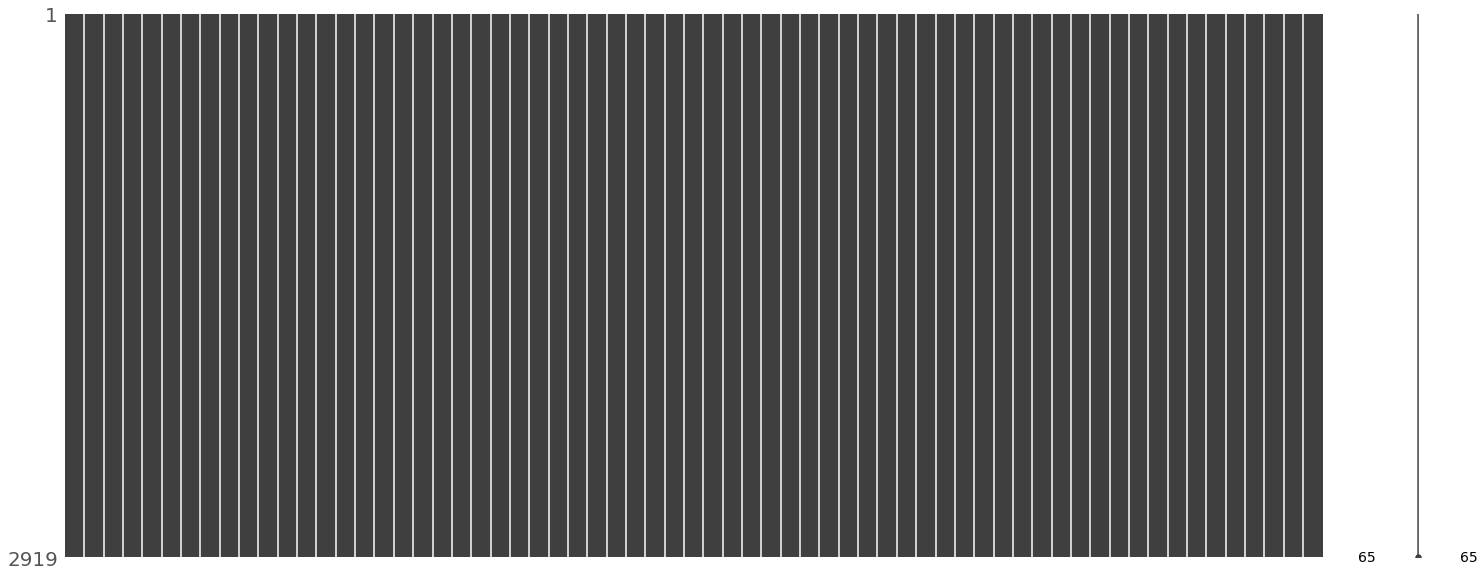

In [22]:
import missingno
missingno.matrix(dftotal)

In [38]:
#now I will extract a random sample from the original df. 
sample=dftotal.sample(frac=0.20, axis='rows')
sample.describe()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,1459.693493,5.558219,10404.275685,0.994863,1.400685,1.208904,1.003425,1.426370,1.065068,3.047945,...,52.323630,22.626712,1.767123,17.686644,4.806507,111.386986,6.203767,2007.695205,1.530822,1.565068
std,864.449464,4.422774,8679.638514,0.071550,0.571237,0.647616,0.082761,0.775741,0.273242,0.831062,...,74.349435,59.561500,19.341755,61.599515,54.602841,1139.661393,2.791420,1.279034,1.433156,1.484931
min,3.000000,1.000000,1470.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000,1.000000
25%,742.750000,1.000000,7290.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,1.000000,1.000000
50%,1408.000000,6.000000,9602.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.000000,1.000000
75%,2214.250000,8.250000,11779.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000,1.000000
max,2918.000000,16.000000,164660.000000,1.000000,4.000000,4.000000,3.000000,5.000000,3.000000,9.000000,...,523.000000,330.000000,304.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,9.000000,6.000000
